C:\Users\helen\AppData\Local\Temp\ipykernel_15396\315503224.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, xin = wav.read(filename)


[[-59 -59]
 [-46 -46]
 [-39 -39]
 ...
 [-32 -32]
 [-36 -36]
 [-40 -40]]
48000
(8901618, 2)
2
Press: 0.034995294889601306


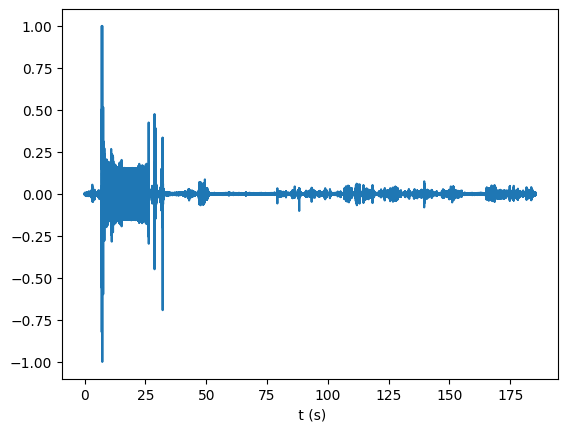

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, firwin
import scipy.io.wavfile as wav

filename= 'ficheiro_Speech_NoiseTest.wav'
filename = 'AulaCalHenriqueStereo.wav'
fs, xin = wav.read(filename)

print(xin)
print(fs)
print(np.shape(xin))
print(len(xin[1]))

if len(np.shape(xin)) > 1 :
    xin = xin[:,1] #o primeiro canal, se dor o segundo canal fica[:,1]

#normalização
xin = xin / np.power(2, 16-1)

#variaveis e constantes

Pref = 20*np.exp(-6)  # referência de pressão em Pa



def CalcPress(x):
    N = len(x)
    press = np.sqrt(1/N* np.sum(x**2))
    return press

def ConvertSPL(x, xref):
    SPL = 20 * np.log10(x / xref)
    return SPL

Press = CalcPress(xin)
print('Press:', Press)

#xin = xin/np.max(np.abs(xin))

xinLen = 1524



t = np.arange(0, len(xin)) / fs
plt.figure()
plt.plot(t, xin)
plt.xlabel(' t (s)')
plt.show()


SPL = SPLcal + SPLcomp 

for i in range(0, Nxin):






In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, firwin, butter, freqz
import scipy.io.wavfile as wav


filename = 'RT60_Sala.wav'

fs, xin = wav.read(filename)

print(xin)
print(fs)
print(np.shape(xin))
print(len(np.shape(xin)))
print(np.shape(xin[1]))

if (len(np.shape(xin))) > 1:
    xin = xin[:,1]

xin = xin / np.power(2, 16-1)

#xin = xin/(np.max(np.abs(xin)))

#xin = xin[1900000: 2200000] # olhei para o plot
xin = xin[59550: 85000]  # olhei para o plot
E_xin = xin**2
E_xin_dB = 10*np.log10(E_xin + 10**-6)  # para evitar log(0)

winlen = 1000
bk = np.ones(winlen)/winlen

E_xin_smooth = np.convolve(bk, E_xin, 'same')
print ('E_xin_smooth:', E_xin_smooth)
print('len(xin):', len(xin))
print('len(E_xin_smooth):', len(E_xin_smooth))

E_xin_smooth_dB = 10*np.log10(E_xin_smooth + 10**-6)  # para evitar log(0)np

sinal1 = np.ones(winlen)

E_xin_rev = E_xin[::-1]
E_xin_rev_cum = np.cumsum(E_xin_rev)
E_xin_rev_cum = E_xin_rev_cum[::-1]
E_xin_rev_cum_dB = 10*np.log10(E_xin_rev_cum + 10**-6)

D = (E_xin_rev_cum_dB[int( 0.9 + len(E_xin_rev_cum_dB))]- E_xin_rev_cum_dB[0])/(0.9 + len(E_xin_rev_cum_dB) - 0)
print('D', D)
RT60 = 60/D
print('RT60:', RT60)

# ==== plots
t = np.arange(0, len(xin))/fs
plt.figure()
plt.subplot(3, 1, 1)
#plt.plot(t, xin)
plt.plot(xin)
plt.subplot(3, 1, 2)

#plt.plot(t, xin)
plt.plot(E_xin)
plt.plot(E_xin_smooth, 'r')
plt.subplot(3, 1, 3)

#plt.plot(t, xin)
plt.plot(E_xin_dB)
plt.plot(E_xin_smooth_dB, 'r')
plt.xlabel('tempo (s)')
plt.title('xin, E_xin, E_xin_dB')
plt.show()


plt.figure()
plt.plot(E_xin_rev_cum_dB)
plt.plot(E_xin_rev, 'r')
plt.title('Cumulative Sum of Energy')
plt.show()

[-16 -17 -16 ... -17 -17 -17]
48000
(3642051,)
1
()
E_xin_smooth: [1.42952318e-03 1.42968983e-03 1.42975086e-03 ... 2.70475633e-07
 2.70416029e-07 2.70370394e-07]
len(xin): 25450
len(E_xin_smooth): 25450


C:\Users\helen\AppData\Local\Temp\ipykernel_28204\278568293.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, xin = wav.read(filename)


TypeError: 'numpy.ndarray' object is not callable